0.43017335705569354  --  0.0  --  0.1850491171205652 3.814950882879435 4
0.9507064642071081  --  1.0  --  0.0024298526709651113 3.8125210302084698 4
0.6363661399299271  --  1.0  --  0.13222958418946137 3.6802914460190084 4
0.9781226433436455  --  0.0  --  0.9567239054215604 2.7235675405974478 4

0.7634322635077789  --  0.0  --  0.5828288209646107 3.4171711790353894 4
0.9981424214371384  --  1.0  --  3.4505981172030307e-06 3.4171677284372723 4
1.2360015587353001e-05  --  1.0  --  0.9999752801215953 2.417192448315677 4
0.0020538174310945918  --  0.0  --  4.218166040267988e-06 2.4171882301496366 4

0.7823947460296555  --  0.0  --  0.6121415386148091 3.387858461385191 4
0.9978587627831758  --  1.0  --  4.584896818713231e-06 3.3878538764883723 4
0.9999893346806307  --  1.0  --  1.1374903724979657e-10 3.3878538763746233 4
0.999999917713097  --  0.0  --  0.9999998354262009 2.3878540409484224 4

0.9919440516749327  --  0.0  --  0.9839530016532816 3.0160469983467184 4
0.9999371286018934  --  1.

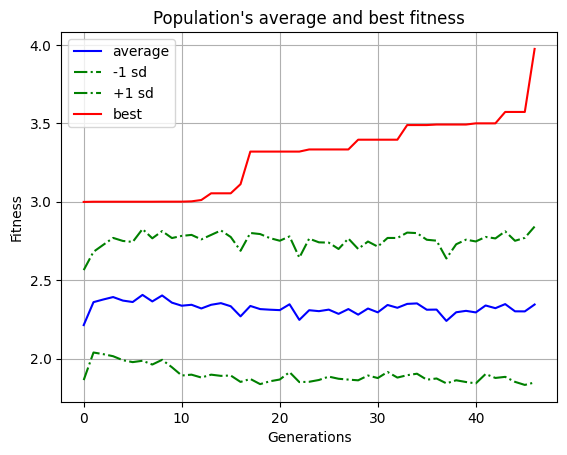

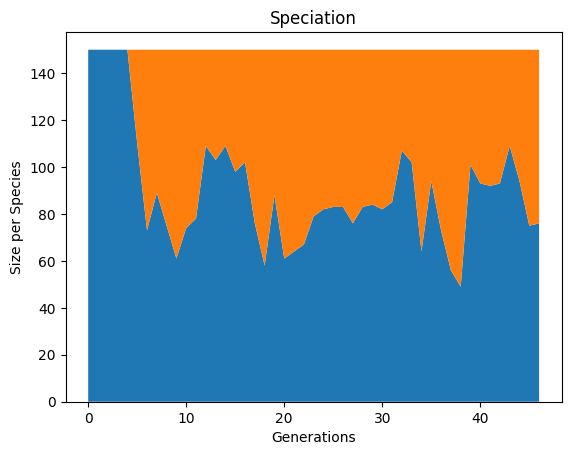


Output:


In [3]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

import os

import neat
import my_visualize as visualize

# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2
            print(output[0], ' -- ', xo[0], ' -- ', (output[0] - xo[0]) ** 2, genome.fitness, len(xor_inputs))
        print()



def run(config_file):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    #p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
   #print('\nBest genome:\n{!s}'.format(winner))

   ## Show output of the most fit genome against training data.
   #print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
   #     print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1: 'A', -2: 'B', 0: 'A XOR B'}
    visualize.draw_net(config, winner, True, node_names=node_names)
    #visualize.draw_net(config, winner, True, node_names=node_names, prune_unused=True)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    # output the structure of the winner
    print('\nOutput:')
    print(winner_net)



if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    config_path = 'A:/Профиль/Rab Table/Учёба/2/Neuroevolutionary-computing/Код/учимся/config-xor'
    run(config_path)